<a href="https://colab.research.google.com/github/JosePabloGFnl/Tensorflow-Practice/blob/main/ImageClassificationPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for this, we are going to reduce images to 28x28 pixels.
#we'll start with a simple NN and finally a CNN
#the ZalandoResearch opensource info will be useful for this

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfdf #to use the zalando dataset

In [2]:
datos, metadatos = tfdf.load('fashion_mnist', as_supervised=True, with_info=True) #to download our dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteE03OAI/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteE03OAI/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#note: the red bars aren't an issue

In [3]:
metadatos #to print the info of the dataset

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [4]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test'] #tip: ctrl + enter to run a line

In [7]:
nombres_clases = metadatos.features['label'].names

In [8]:
nombres_clases #our classes starting from 0

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
#Normalize the data (from 0-255 to 0-1)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #from 0-255 to 0-1
  return imagenes, etiquetas

#Normalize the training data and test the made function
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Using memory for faster training
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

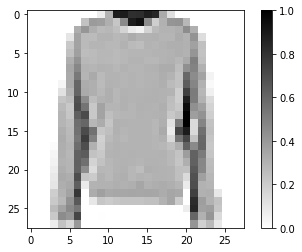

In [11]:
#Showing an image from the dataset, the first one

for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

#drawing the image
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

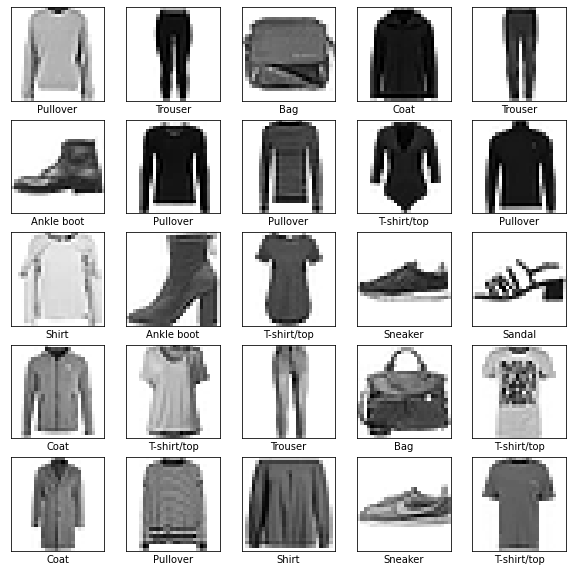

In [12]:
#Showing the tags of the images
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [13]:
#---Creating the model---

modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = black and white, Flatten is used to redimension the image to our parameter
  #two input layers
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  #one output layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #for classification networks, used in our predictions
])


In [15]:
#---Compiling the model---

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
#variables created for the size of training and testing
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [17]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [18]:
LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(LOTE) #60,000 is the datasize
datos_pruebas = datos_pruebas.batch(LOTE)

In [19]:
#---Training---

import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch = math.ceil(num_ej_entrenamiento/LOTE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5286 - accuracy: 0.8126
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8606
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3448 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.8784
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8862


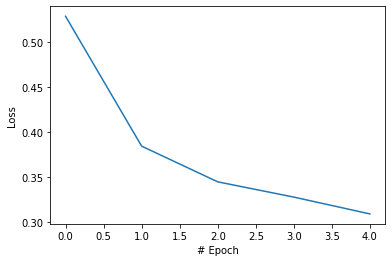

In [20]:
#---Loss function---
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.plot(historial.history["loss"])

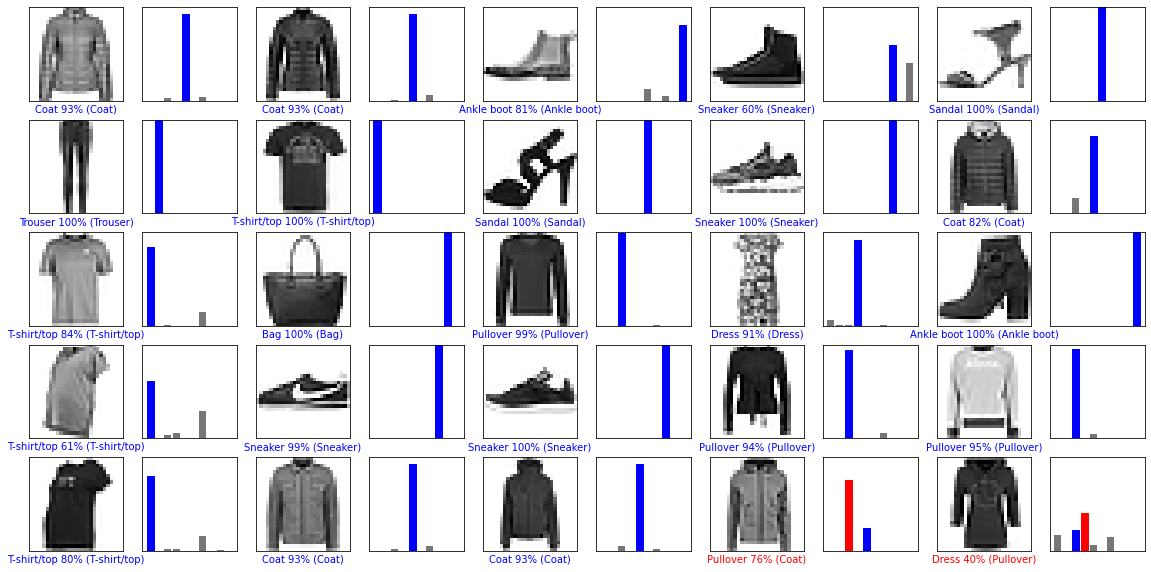

In [21]:
#---Predictions---
#Well resulted predictions are represented with a blue bar, the contrary with a red one
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [22]:
#Test an individual image
imagen = imagenes_prueba[4] 
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

Prediccion: Sandal


In [ ]:
#---How to imprive this model with tensorflow.js---
#Export the model to h5
modelo.save('modelo_exportado.h5')

In [ ]:
#Install tensorflowjs to convert the h5 to a model that can be used in our explorer
!pip install tensorflowjs

In [ ]:
#Convert the h5 file to tensorflowjs format
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

In [ ]:
#To verify if the folder was made
!ls

In [ ]:
#To see the content of said folder
!ls tfjs_target_dir